<a href="https://colab.research.google.com/github/Anto25vaz/-proyecto_integrado_2aa/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# prompt:  armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias de nivel secundario en Argentina
materias = ['Matemática', 'Lengua y Literatura', 'Historia', 'Geografía', 'Ciencias Naturales', 'Física', 'Química', 'Biología', 'Educación Física', 'Inglés', 'Ciudadanía', 'Arte', 'Música']

# Apellidos y nombres comunes (puedes expandir esta lista)
apellidos = ['Gómez', 'Rodríguez', 'Pérez', 'García', 'López', 'Martínez', 'González', 'Sánchez', 'Romero', 'Fernández']
nombres = ['Juan', 'Pedro', 'María', 'Ana', 'José', 'Laura', 'Carlos', 'Sofía', 'Diego', 'Valentina']

# Crear una lista de datos para el DataFrame
data = []
for i in range(100):  # Generar 100 filas de datos
  apellido = random.choice(apellidos)
  nombre = random.choice(nombres)
  dni = random.randint(10000000, 99999999)
  materia = random.choice(materias)
  nota1 = random.randint(1, 10)  # Notas aleatorias
  nota2 = random.randint(1, 10)
  nota3 = random.randint(1, 10)
  faltas = random.randint(0, 20) # Faltas aleatorias
  data.append([apellido, nombre, dni, materia, nota1, nota2, nota3, faltas])

# Crear el DataFrame
df = pd.DataFrame(data, columns=['Apellido', 'Nombre', 'DNI', 'Materia', 'Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre', 'Faltas a clases'])

# Mostrar las primeras 5 filas del DataFrame
print(df.head())

    Apellido     Nombre       DNI    Materia  Nota 1er Trimestre  \
0      Gómez      Diego  16377405     Música                   5   
1  Rodríguez  Valentina  93790731     Física                   8   
2     García      Laura  85382361       Arte                  10   
3   Martínez        Ana  66595918       Arte                   6   
4     Romero       Juan  79740895  Geografía                   1   

   Nota 2do Trimestre  Nota 3er Trimestre  Faltas a clases  
0                   3                   7               13  
1                   8                   6                5  
2                   6                   5                8  
3                  10                   2               19  
4                   8                   7                3  


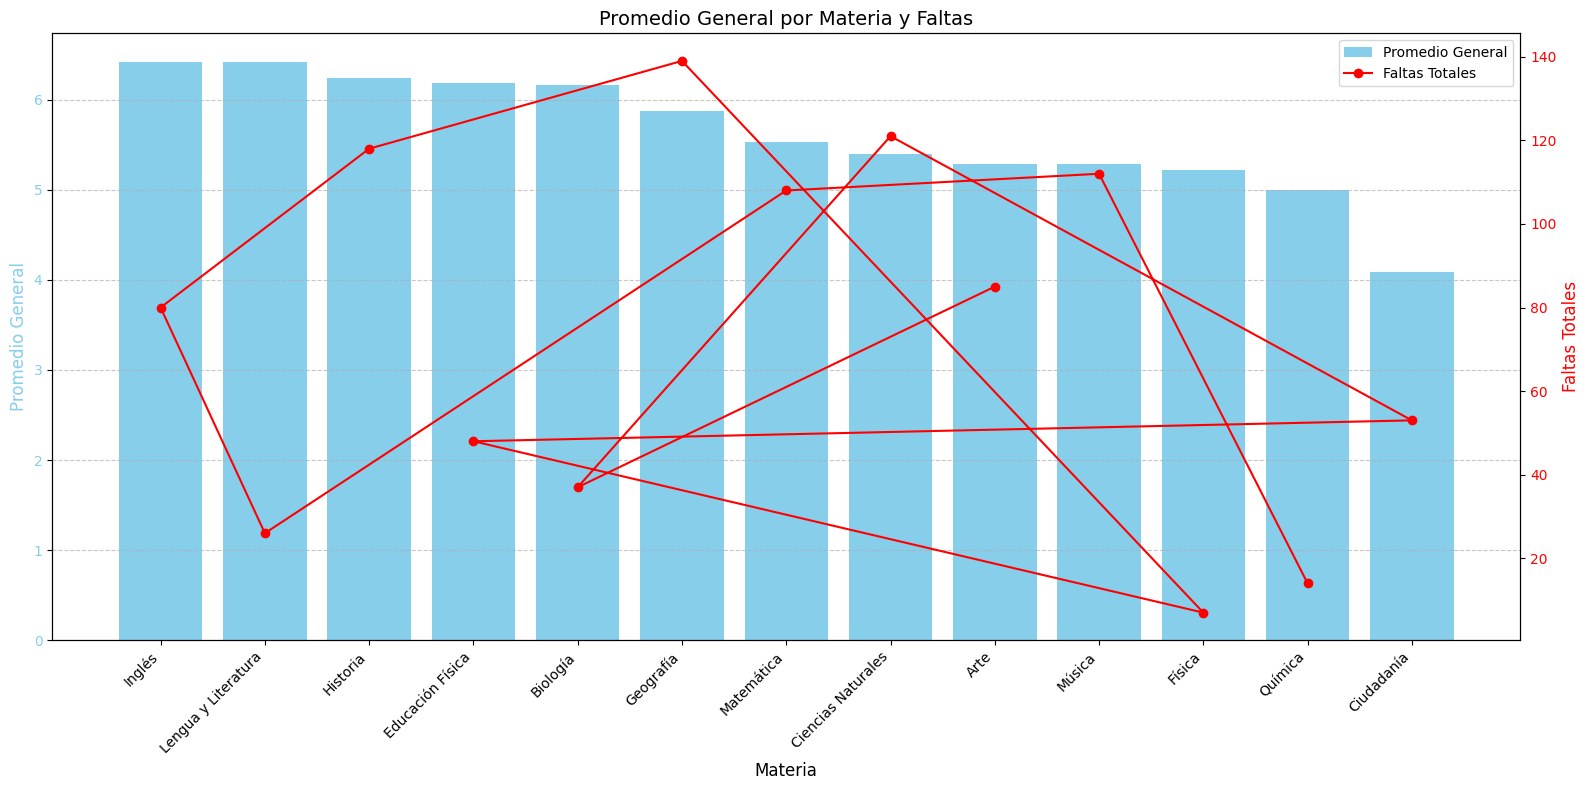

In [3]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor contratable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ... (previous code) ...

# Calculate the average grade for each subject
average_grades = df.groupby('Materia').agg({'Nota 1er Trimestre': 'mean', 'Nota 2do Trimestre': 'mean', 'Nota 3er Trimestre': 'mean'})
average_grades['Promedio General'] = average_grades.mean(axis=1)
average_grades = average_grades.sort_values('Promedio General', ascending=False)

# Calculate total absences per subject
total_absences = df.groupby('Materia')['Faltas a clases'].sum()


# Create the bar chart
fig, ax1 = plt.subplots(figsize=(16, 8))

# Bar plot for average grades
ax1.bar(average_grades.index, average_grades['Promedio General'], color='skyblue', label='Promedio General')
ax1.set_xlabel('Materia', fontsize=12)
ax1.set_ylabel('Promedio General', color='skyblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Promedio General por Materia y Faltas', fontsize=14)
plt.xticks(rotation=45, ha='right')


# Create a second y-axis for absences
ax2 = ax1.twinx()
ax2.plot(total_absences.index, total_absences, marker='o', color='red', label='Faltas Totales')
ax2.set_ylabel('Faltas Totales', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')


# Add legends and grid
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')
ax1.grid(axis='y', linestyle='--', alpha=0.7)


# Show the plot
plt.tight_layout()
plt.show()

In [4]:
df.to_csv("datos_alumnos.csv", index=False)